<a href="https://colab.research.google.com/github/Nirupama-tech/ML/blob/main/Worklife_balance_Turnover.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from google.colab import files
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:
uploaded=files.upload()

Saving train.csv to train.csv


In [ ]:
data=pd.read_csv("train.csv")
data.head()

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,Male,19,Education,5390,Excellent,Medium,Average,2,...,0,Mid,Medium,89,No,No,No,Excellent,Medium,Stayed
1,64756,59,Female,4,Media,5534,Poor,High,Low,3,...,3,Mid,Medium,21,No,No,No,Fair,Low,Stayed
2,30257,24,Female,10,Healthcare,8159,Good,High,Low,0,...,3,Mid,Medium,74,No,No,No,Poor,Low,Stayed
3,65791,36,Female,7,Education,3989,Good,High,High,1,...,2,Mid,Small,50,Yes,No,No,Good,Medium,Stayed
4,65026,56,Male,41,Education,4821,Fair,Very High,Average,0,...,0,Senior,Medium,68,No,No,No,Fair,Medium,Stayed


In [ ]:
x=data["Work-Life Balance"].unique()
print(x)

['Excellent' 'Poor' 'Good' 'Fair']


In [ ]:
data["Work-Life Balance"] = pd.Categorical(data["Work-Life Balance"], categories=['Poor','Fair','Good','Excellent'])



In [ ]:
print(data['Work-Life Balance'])

In [ ]:
Attrition_Balance_Count=data.groupby(["Attrition","Work-Life Balance"]).size().unstack().fillna(0)
print(Attrition_Balance_Count)

Work-Life Balance  Poor   Fair   Good  Excellent
Attrition                                       
Left               4992  10370   9137       3839
Stayed             3313   7676  13391       6880


<ipython-input-34-a488cc2a7344>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Attrition_Balance_Count=data.groupby(["Attrition","Work-Life Balance"]).size().unstack().fillna(0)


In [ ]:
print(Attrition_Balance_Count.sum(axis=1))

Attrition
Left      28338
Stayed    31260
dtype: int64


In [ ]:
Attrition_Balance_Percentage= Attrition_Balance_Count.div(Attrition_Balance_Count.sum(axis=1),axis=0)*100
print(Attrition_Balance_Percentage)


Work-Life Balance       Poor       Fair       Good  Excellent
Attrition                                                    
Left               17.615922  36.593973  32.242925  13.547180
Stayed             10.598209  24.555342  42.837492  22.008957


In [ ]:
left= Attrition_Balance_Count.loc["Left"]

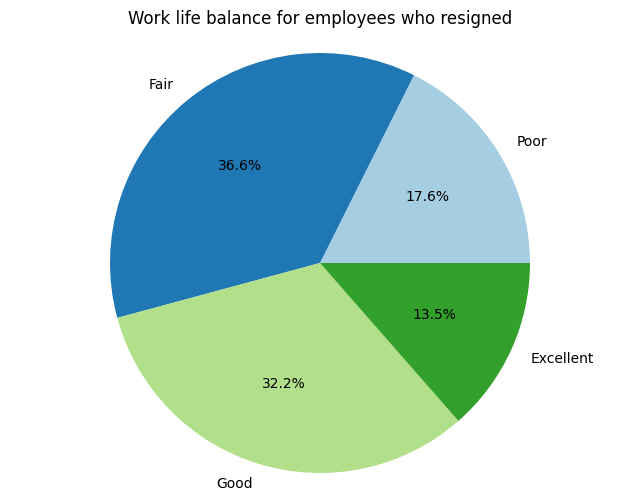

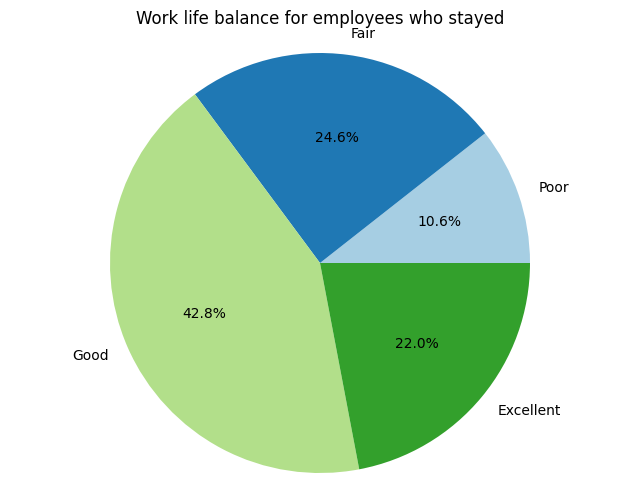

In [ ]:
Stayed=Attrition_Balance_Count.loc["Stayed"]
def plot_pie_chart(data,title):
  plt.figure(figsize=(8,6))
  plt.pie(data,labels=data.index,autopct="%1.1f%%",colors=plt.cm.Paired(range(len(data))))
  plt.title(title)
  plt.axis("equal")
  plt.show()
plot_pie_chart(left,"Work life balance for employees who resigned")
plot_pie_chart(Stayed,"Work life balance for employees who stayed")